### Topic Detection with LDA

This workbook aims to follow the project proposal for the text mining project for "Sentiment Analysis for Newspapers". The idea is to scrape/download articles from newspapers and detect their topic so articles covering similar topics can be mapped against each other. This workbook focuses on topic detection utilizing LDA (Latent Dirichlet Allocation).

This work was inpired by this article: https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc

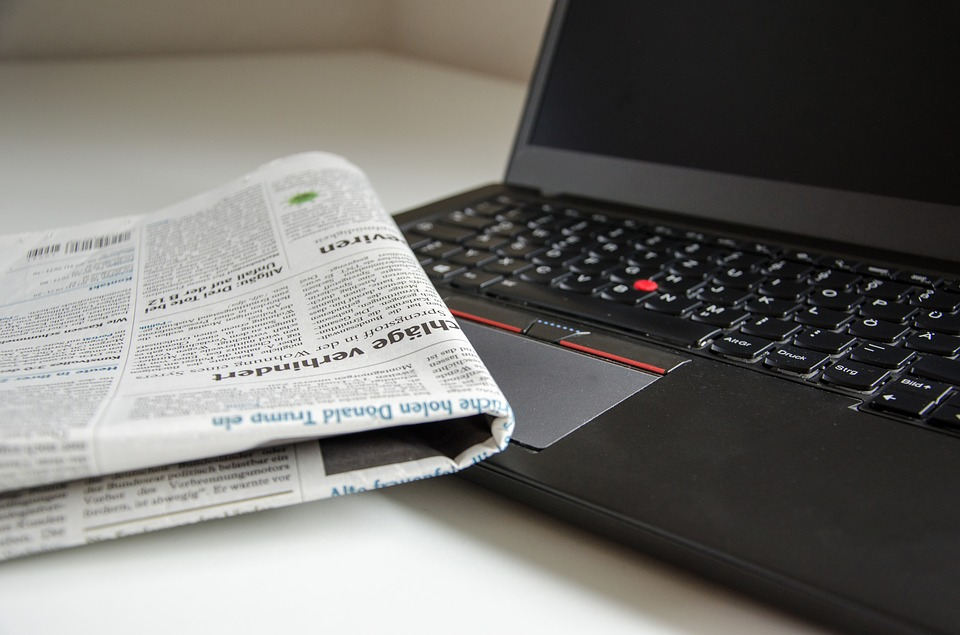

### LDA (Latent Dirichlet Allocation)

LDA is a technique for topic modelling. Topic modelling refers to the task, that for a set of documents a finite set of topics are assigned and detected.
The idea behind this algorithm is rather simple. The algorithm takes a bunch of "imaginary topics", which are represented as a set of words and tries to map these to the documents in a way that most words in a document are captured by these imaginary topics. The result should be a set of topics, which are mapped to each document.

https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158

https://www.youtube.com/watch?v=3mHy4OSyRf0&t=1058s

### Step 1: Getting the Data of the Newspapers

The data (the newspaper articles) are already downloaded and taken care of in the notebook *Articles Scrapping*. Also the arising issues with it are described there. In this section the data is uploaded again and made available in a format that can be used for the later analysis.

In [1]:
import text_transformer as tt

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tt.preprocessing??

In [2]:
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]

In [3]:
filter_words = ["Trump", "Kim", "Syria", "Merkel"]

In [4]:
%time news_dict, corpus_all = tt.preprocessing(directory="articles", verbose= True, remove_words=remove_tokens, filter_words=filter_words)

We're at 0.0% of the data.
We're at 8.72% of the data.
We're at 17.44% of the data.
We're at 26.16% of the data.
We're at 34.87% of the data.
We're at 43.59% of the data.
We're at 52.31% of the data.
We're at 61.03% of the data.
We're at 69.75% of the data.
We're at 78.47% of the data.
We're at 87.18% of the data.
We're at 95.9% of the data.
Articles used: 14.21 %
Articles used: 815/5735
*********************************************
652  ( 11.37 %) Articles were filtered out because of length and
4268  ( 74.42 %) Articles were filtered out because of the filter words.
CPU times: user 1min 32s, sys: 8.13 s, total: 1min 40s
Wall time: 1min 41s


### Step 2: The LDA Model

**Remember**: The goal of this exercise is to find topics.Topics are represented as words assigned to probabilities.

In [5]:
!pip install gensim

from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...
dictionary_LDA = corpora.Dictionary(corpus_all)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in corpus_all]

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 18.5 s, sys: 10 s, total: 28.5 s
Wall time: 15.5 s


In [16]:
# get the topics
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
print()

0: 0.006*"new" + 0.005*"jill" + 0.004*"north" + 0.004*"one" + 0.003*"last" + 0.003*"two" + 0.003*"police" + 0.003*"told" + 0.003*"march" + 0.003*"korea"
1: 0.004*"back" + 0.004*"like" + 0.004*"one" + 0.004*"time" + 0.003*"home" + 0.003*"told" + 0.002*"years" + 0.002*"first" + 0.002*"day" + 0.002*"new"
2: 0.004*"one" + 0.003*"people" + 0.003*"get" + 0.003*"time" + 0.003*"last" + 0.003*"new" + 0.003*"corn" + 0.003*"two" + 0.003*"year" + 0.003*"dogs"
3: 0.009*"people" + 0.006*"new" + 0.005*"one" + 0.004*"two" + 0.004*"boeing" + 0.003*"max" + 0.003*"city" + 0.003*"last" + 0.003*"like" + 0.003*"—"
4: 0.010*"may" + 0.009*"deal" + 0.008*"brexit" + 0.006*"eu" + 0.004*"people" + 0.004*"mps" + 0.004*"minister" + 0.004*"one" + 0.004*"told" + 0.003*"prime"
5: 0.010*"israel" + 0.008*"trump" + 0.006*"syria" + 0.006*"golan" + 0.005*"president" + 0.005*"state" + 0.004*"israeli" + 0.004*"heights" + 0.004*"territory" + 0.003*"group"
6: 0.018*"trump" + 0.009*"mueller" + 0.009*"report" + 0.009*"president"

In [18]:
#print the % of topics a document is about
lda_model[corpus[0]] # corpus[0] means the first document.

[(0, 0.3329393), (3, 0.58291668), (7, 0.083857693)]

It is also possible to predict topics on unseen documents with this approach. However, we neglect this feature for now as it doesn't serve the purpose of the project.

### Accessing and Analysing the results

In [39]:
import numpy as np

In [47]:
# get a list of topics for each article in the corpus
topic_articles = [lda_model[corpus[i]] for i in range(0, len(corpus))]

In [135]:
# get a countplot for each topic

topic_counts = {}

for doc in topic_articles:
    temp_prob = [prob[1] for prob in doc]
    temp_top = doc[np.argmax(temp_prob)][0]
    
    if temp_top in topic_counts.keys():
        topic_counts[temp_top] +=1
    else:
        topic_counts[temp_top] = 1
    
import seaborn as sns
import pandas as pd

data = pd.DataFrame.from_dict(topic_counts, orient='index').T
print(data)
print(data.columns)
sns.set(style="darkgrid")
ax = sns.countplot(y=, data=data)

     3   2    6    8    4    5    1   9    0   7
0  221  88  249  169  168  124  121  76  124  94
Int64Index([3, 2, 6, 8, 4, 5, 1, 9, 0, 7], dtype='int64')


TypeError: 'range' object is not callable

TypeError: '<' not supported between instances of 'dict' and 'float'

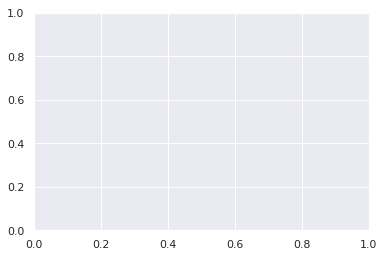

In [142]:
import matplotlib.pyplot as plt
plt.hist(topic_counts)
plt.show()

In [138]:
import pandas as pd
test = pd.DataFrame.from_dict(topic_counts, orient='index')

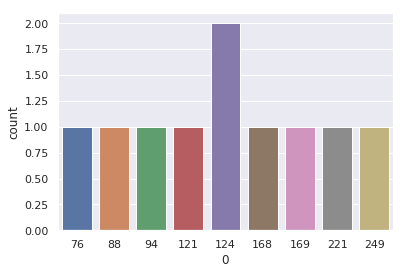

In [141]:
sns.countplot(x=0, data=test)

In [110]:
topic_counts

{3: 221, 2: 88, 6: 249, 8: 169, 4: 168, 5: 124, 1: 121, 9: 76, 0: 124, 7: 94}

In [20]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
